Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [1]:
# your code here
import sqlite3
from collections import Counter
import pandas as pd
from pandas.plotting import parallel_coordinates, scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

db_filename =  '/course/data/CSE-578/dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

### **Question 1:**
Create a distance matrix suitable for use in hierarchical clustering of the checkin sequences of the 5 specified visitors.

Your distance function should count the number of dissimilarities in the sequences without considering any other factors.

**Note** 
* The distance matrix should be reported as a dictionary of dictionaries (eg. {1: {2:0, 3:0, 4:0}, 2: {1:0, 3:0, ...}, ...}).
* The order of the output is not important.

In [2]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
import collections

c.execute('''SELECT visitorId, sequence from sequences
            where visitorId in (165316, 1835254, 296394, 404385, 448990)
            ''')
counts = c.fetchall()
visitor = []
sequence = []

for item in counts:
    visitor.append(item[0])
    sequence.append(item[1])

def sim(x,y):
    simi = []
    for i in range(len(x)):
        if x[i]!=y[i]:
            simi.append(i)
    return simi

output = {}
for i in range(5):
    similarity = {}
    for j in range(5):
        if i!=j:
            similarity[visitor[j]] = len(sim(sequence[i].split('-'), sequence[j].split('-')))
    output[visitor[i]] = similarity
print(output)

{165316: {296394: 318, 404385: 329, 448990: 318, 1835254: 336}, 296394: {165316: 318, 404385: 303, 448990: 0, 1835254: 282}, 404385: {165316: 329, 296394: 303, 448990: 303, 1835254: 298}, 448990: {165316: 318, 296394: 0, 404385: 303, 1835254: 282}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}}


### **Question 2:**  
Create and display a Parallel Coordinate Plot displaying the minimum, maximum and average attendance for each ride in the park.

For this question, display a Parallel Coordinate Plot in the notebook and print the data used to create a Parallel Coordinate Plot as a dictionary of dictionaries (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... })

**Note:** 
* Not all attractions are rides.
* The output should be a dictionary and the order of the output is not important.
* Use the parallel coordinates function from the **pandas library** to generate the graph.
* The Parallel Coordinate plot must have the below mentioned parameters,
    * legend and it should be outside the plot.
    * y-label ('**Attendance**')
    * title named '**Ride Attendance - Minimum, Maximum, Average**'
* The plot must not have the following parameters,
    * do not set figure size
    * do not set font size or font-weight for titles and labels

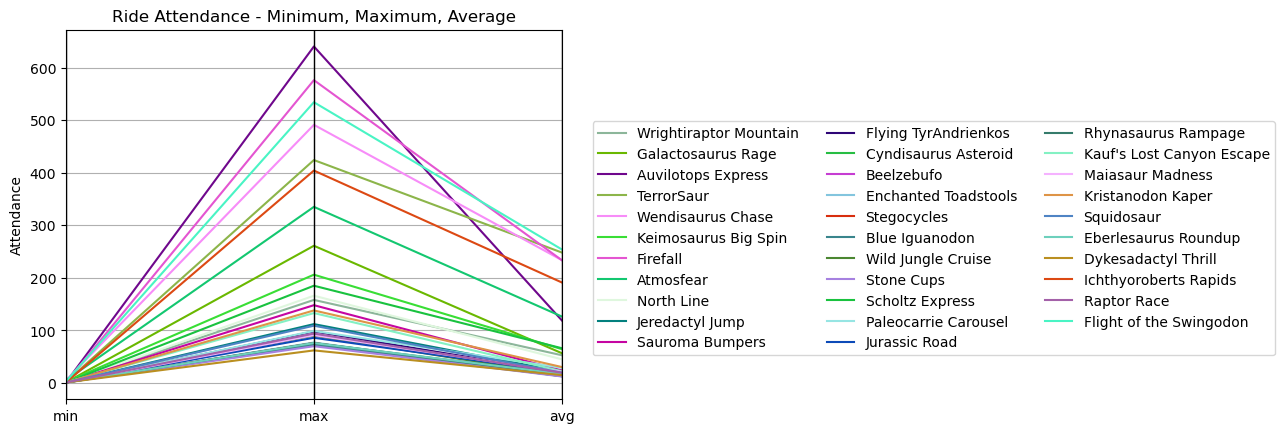

{'Wrightiraptor Mountain': {'min': 1, 'max': 158, 'avg': 52.75}, 'Galactosaurus Rage': {'min': 1, 'max': 261, 'avg': 56.63715277777778}, 'Auvilotops Express': {'min': 1, 'max': 640, 'avg': 118.97916666666667}, 'TerrorSaur': {'min': 2, 'max': 424, 'avg': 248.09375}, 'Wendisaurus Chase': {'min': 5, 'max': 491, 'avg': 233.6875}, 'Keimosaurus Big Spin': {'min': 2, 'max': 206, 'avg': 64.39756944444444}, 'Firefall': {'min': 1, 'max': 576, 'avg': 233.46875}, 'Atmosfear': {'min': 5, 'max': 335, 'avg': 126.359375}, 'North Line': {'min': 1, 'max': 166, 'avg': 45.06944444444444}, 'Jeredactyl Jump': {'min': 1, 'max': 112, 'avg': 21.66840277777778}, 'Sauroma Bumpers': {'min': 1, 'max': 148, 'avg': 23.866319444444443}, 'Flying TyrAndrienkos': {'min': 1, 'max': 98, 'avg': 19.76215277777778}, 'Cyndisaurus Asteroid': {'min': 1, 'max': 72, 'avg': 12.947916666666666}, 'Beelzebufo': {'min': 1, 'max': 93, 'avg': 13.869791666666666}, 'Enchanted Toadstools': {'min': 1, 'max': 77, 'avg': 12.864583333333334}, 

In [42]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
attendance_values = []
attendance_count = {}
ride_statistics = {}
c.execute("SELECT Name, attractionID FROM attraction WHERE LOWER(Category) LIKE '%ride%'")
ride_info = c.fetchall()

for ride_entry in ride_info:
    ride_name, ride_id = ride_entry
    c.execute("SELECT sequence FROM sequences WHERE sequence LIKE '%-" + str(ride_id) + "-%'")
    sequences = c.fetchall()
    sequence_length = len(sequences[0][0].split('-'))

    for seq_entry in sequences:
        sequence = seq_entry[0].split('-')
        for time_index in range(sequence_length):
            if sequence[time_index] == str(ride_id):
                attendance_values.append(time_index)

    for item in attendance_values:
        if item in attendance_count:
            attendance_count[item] += 1
        else:
            attendance_count[item] = 1

    attendance_values.clear()

    sorted_attendance = sorted(attendance_count.items())
    attendance_count.clear()
    attendance_list = [list(ele) for ele in sorted_attendance]

    max_attendance = 0
    min_attendance = sequence_length
    total_attendance = 0

    for entry in attendance_list:
        if entry[1] > max_attendance:
            max_attendance = entry[1]
        if entry[1] < min_attendance:
            min_attendance = entry[1]
        total_attendance += entry[1]

    avg_attendance = total_attendance / sequence_length
    ride_statistics[ride_name] = {"min": min_attendance, "max": max_attendance, "avg": avg_attendance}

output_frame = pd.DataFrame.from_dict(ride_statistics, orient='index')
output_frame = output_frame.reset_index()
output_frame.columns = ['ride' if x == 'index' else x for x in output_frame.columns]

pd.plotting.parallel_coordinates(output_frame, 'ride')
plt.title('Ride Attendance - Minimum, Maximum, Average')
plt.legend(loc="lower center", bbox_to_anchor=(1.75,0.1), ncol=3)
plt.ylabel('Attendance')
plt.show()

output_dict = {}
for index, row in output_frame.iterrows():
    ride_name = row['ride']
    min_attendance = row['min']
    max_attendance = row['max']
    avg_attendance = row['avg']
    output_dict[ride_name] = {'min': min_attendance, 'max': max_attendance, 'avg': avg_attendance}


print(output_dict)

### **Question 3:**
Create and display a Scatterplot Matrix displaying the minimum, maximum and average attendance for each ride in the park.


**Note:** 
* Print the output values of Question 2 as the same data will be used for Scatterplot.
* The output should be a dictionary (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... }) and the order of the output is not important.
* This is a different view into the same data as the previous part. Use the scatter plot matrix function from the **pandas library** to generate the graph.
* While you work on these plots, consider the different things that each chart says about the data.
* The Scatterplot must have the below mentioned parameters,
    * title named ' **Scatterplot Matrix - Minimum, Maximum, Average Attendance** '
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

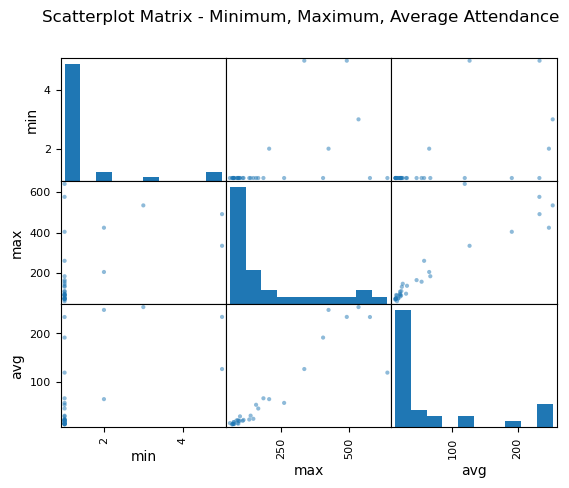

{'Wrightiraptor Mountain': {'min': 1, 'max': 158, 'avg': 52.75}, 'Galactosaurus Rage': {'min': 1, 'max': 261, 'avg': 56.63715277777778}, 'Auvilotops Express': {'min': 1, 'max': 640, 'avg': 118.97916666666667}, 'TerrorSaur': {'min': 2, 'max': 424, 'avg': 248.09375}, 'Wendisaurus Chase': {'min': 5, 'max': 491, 'avg': 233.6875}, 'Keimosaurus Big Spin': {'min': 2, 'max': 206, 'avg': 64.39756944444444}, 'Firefall': {'min': 1, 'max': 576, 'avg': 233.46875}, 'Atmosfear': {'min': 5, 'max': 335, 'avg': 126.359375}, 'North Line': {'min': 1, 'max': 166, 'avg': 45.06944444444444}, 'Jeredactyl Jump': {'min': 1, 'max': 112, 'avg': 21.66840277777778}, 'Sauroma Bumpers': {'min': 1, 'max': 148, 'avg': 23.866319444444443}, 'Flying TyrAndrienkos': {'min': 1, 'max': 98, 'avg': 19.76215277777778}, 'Cyndisaurus Asteroid': {'min': 1, 'max': 72, 'avg': 12.947916666666666}, 'Beelzebufo': {'min': 1, 'max': 93, 'avg': 13.869791666666666}, 'Enchanted Toadstools': {'min': 1, 'max': 77, 'avg': 12.864583333333334}, 

In [44]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
pd.plotting.scatter_matrix(output_frame)
plt.suptitle('Scatterplot Matrix - Minimum, Maximum, Average Attendance')
plt.show()
print(output_dict)